# Deep Neural Network with Caffe
### Extracted and enhanced from [Caffe's Documentation](https://github.com/BVLC/caffe/blob/master/examples/00-classification.ipynb)


Coding by hand a problem such as speech recognition is nearly impossible due to the shear amount of variance in the data. The way our brain interprets these kind of problems are complex but turns out they can be modeled with a substantial amount of accuracy, sometimes beating humans itself. The whole concept of artifical neural network started evolving in and after the 1950's. Artificial Neurons gradually evolved from a simple Perceptron to Sigmoid neurons and then to many other forms. Earlier neurons were able to provide binary output to the many inputs that we provide. Newer algorithms and activation functions allow artificial neural network to make complex predictions by learning on its own.

In an artificial neural network, group of neurons are visualized as a layer. ANN's have multiple layers, each layer doing a specific task. The first layer is always the input layer where we input our training or test data. The last layer is the ouput layer where we get the output. Any layer in between is called a hidden layer, which does not take an input or give an output directly from us users.

Whenever you have many number of layers in your ANN, it is termed as a Deep Neural Network (DNN). DNN's have enabled complex Speech recognition, Natural language processing, Computer vision and many other once Star-Trek level Sci-Fi technologies in to existance now. Academic and industrial level research is greatly improving the performance and architecture of DNN's and it is an exciting field to work with.

With huge players like Google opensourcing part of their Machine Learning systems like the TensorFlow software library for numerical computation, there are many options for someone interested in starting off with Machine Learning/Neural Nets to choose from. **Caffe**, a deep learning framework developed by the **Berkeley Vision and Learning Center (BVLC)** and its contributors, comes to the play with a fresh cup of coffee.This tutorial aims in providing an introduction to **Caffe**. The installation instructions can be found [here](https://github.com/arundasan91/Caffe/blob/master/Installation_Instructions/Caffe%20Installation%20Instructions.md).

We will first use a pre-trained model and figure out how Caffe handles a Classification problem. The example is extracted from Caffe's own example section on their GitHub page. Caffe's [Github repo provides examples](https://github.com/BVLC/caffe/tree/master/examples) on many different algorithms and approaches.
I have added my own code and enhancements to help better understand the working of Caffe. Once we are through our Classification example using the pre-trained network, we will try to architect our own network by defining each and every layer. 

First let us import some libraries that are required to visualize the trained Neural net. These include the Numpy library for saving the trained images as arrays and Matplotlib for plotting various figures and graphs out of it.
We also tune the plot parameters as mentioned below.

In [1]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
# these are for the matplotlib figure's.
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

Caffe's examples are hosted in an example directory inside its root directory. We should run the following python code from the example directory to make sure that the scripts work. We include the *sys* and *os* modules to work with the file paths and the working directory. The caffe's python folder must be fixed as the python path.

In [2]:
# The caffe module needs to be on the Python path;
import sys
import os

caffe_root = '/root/caffe/' # The caffe_root is changed to reflect the actual folder in the server.
sys.path.insert(0, caffe_root + 'python') # Correct the python path

import caffe
# Successfully imported Caffe !


/root/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/root/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/root/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


Training a model is computationally expensive and time consuming. For this example, let us stick on to a pre-trained network bundled with Caffe. We will search for the caffemodel and start from there. Caffemodel is the trained model. During the training phase, on the set time intervals or iterations, Caffe saves caffemodel file which saves the state of the net at that particular time. For example, if we have a total of 10000 iterations to perform and we explicitly mention that we need to save the state of the net at intervals of 2000 iterations, Caffe will generate 5 caffemodel files and 5 solver files, which saves the respective state of the net at iterations 2000,4000,6000,8000 and 10000.

Since we explicitly fixed the working directory, it is not required to have the Notebook in the same directory as that of the example. We define the Model definitions and weights of the pre-trained network by including the correct path. The neural net is defined by using the defenitions and weigths saved earlier. Since the network was already trained for a huge dataset, we can choose the Test mode in caffe and not perform dropout's while defining the net. More info on dropout [here](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf). 

In [3]:
# set Caffe mode as CPU only. This is to be done because OCI servers are not equipped with GPU's yet.
caffe.set_mode_cpu()

# set the model definitions since we are using a pretrained network here.
# this protoype definitions can be changed to make significant changes in the learning method.
model_def = '/root/machineLearning/deepNeuralNet/caffe/caffemodels/bvlc/caffenet/deploy_changed_net.prototxt'
model_weights = '/root/machineLearning/deepNeuralNet/caffe/caffemodels/bvlc/caffenet/caffenet.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

We can visualize our network architecture by converting the model defenition prototxt file into an image. The `draw_net.py` python code will allow us to do that. Let us now see the prototxt file and its visual interpretation. The image here in the notebook is pretty small, you can view it better [here](https://raw.githubusercontent.com/arundasan91/Caffe/master/Data/deploy_changed_net.png).

In [4]:
%%bash
cat /root/machineLearning/deepNeuralNet/caffe/caffemodels/bvlc/caffenet/deploy_changed_net.prototxt
python $CAFFE_ROOT/python/draw_net.py \
/root/machineLearning/deepNeuralNet/caffe/caffemodels/bvlc/caffenet/deploy_changed_net.prototxt \
/root/machineLearning/deepNeuralNet/caffe/caffemodels/bvlc/caffenet/deploy_changed_net.png

name: "CaffeNet"
layer {
  name: "data"
  type: "Input"
  top: "data"
  input_param { shape: { dim: 10 dim: 3 dim: 227 dim: 227 } }
}
layer {
  name: "conv1"
  type: "Convolution"
  bottom: "data"
  top: "conv1"
  convolution_param {
    num_output: 96
    kernel_size: 11
    stride: 4
  }
}
layer {
  name: "relu1"
  type: "ReLU"
  bottom: "conv1"
  top: "conv1"
}
layer {
  name: "pool1"
  type: "Pooling"
  bottom: "conv1"
  top: "pool1"
  pooling_param {
    pool: MAX
    kernel_size: 3
    stride: 2
  }
}
layer {
  name: "norm1"
  type: "LRN"
  bottom: "pool1"
  top: "norm1"
  lrn_param {
    local_size: 5
    alpha: 0.0001
    beta: 0.75
  }
}
layer {
  name: "conv2"
  type: "Convolution"
  bottom: "norm1"
  top: "conv2"
  convolution_param {
    num_output: 256
    pad: 2
    kernel_size: 5
    group: 2
  }
}
layer {
  name: "relu2"
  type: "ReLU"
  bottom: "conv2"
  top: "conv2"
}
layer {
  name: "pool2"
  type: "Pooling"
  bottom: "conv2"
  top: "pool2"
  pooling_param {
    pool

/root/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/root/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/root/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


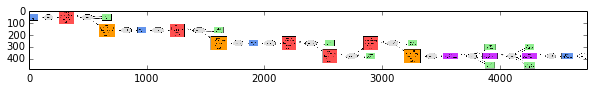

In [5]:
image = caffe.io.load_image('/root/machineLearning/deepNeuralNet/caffe/caffemodels/bvlc/caffenet/deploy_changed_net.png')
plt.imshow(image)

***The image here in the notebook is pretty small, you can view it better [here](The image here in the notebook is pretty small, you can view it better here.).***

Now we can create a transformer to input data into our net. Input data here are images. The subtracted-mean of the images in the dataset considered are to be set in the transformer. Mean subtraction is a way of preprocessing the image. The mean is subtracted across every individual feature in the dataset. This can be interpreted as the centering of a cloud of data around the origin along every dimension. With our input data fixed as images, this relates to subtracting the mean from each of the pixels, seperately across the three channels. More on it [here](http://cs231n.github.io/neural-networks-2/).

These are the steps usually carried out in each transformers:
1. Transpose the data from (height, width, channels) to (channels, width, height)
2. Swap the color channels from RGB to BGR
3. Subtract the mean pixel value of the training dataset (unless you disable that feature).

More information on these [here](https://groups.google.com/forum/#!topic/digits-users/FIh6VyU1XqQ), [here](https://github.com/NVIDIA/DIGITS/issues/59) and [here](https://github.com/NVIDIA/DIGITS/blob/v1.1.0/digits/model/tasks/caffe_train.py#L938-L961).

In [6]:
# load the mean ImageNet image (as distributed with Caffe) for subtraction
mu = np.load('/root/machineLearning/deepNeuralNet/caffe/datasets/ilsvrc12/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print 'mean-subtracted values:', zip('BGR', mu)

# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

mean-subtracted values: [('B', 104.0069879317889), ('G', 116.66876761696767), ('R', 122.6789143406786)]


If needed, we can reshape the data to meet our specifications. In the particular example the batch size, number of channels and image size is explicitly specified as below.

In [7]:
# set the size of the input (we can skip this if we're happy
#  with the default; we can also change it later, e.g., for different batch sizes)
#net.blobs['data'].reshape(50,        # batch size
#                          3,         # 3-channel (BGR) images
#                          227, 227)  # image size is 227x227

Any image can be now loaded into caffe. For simplicity let us now stick with Caffe's example image ($CAFFE_ROOT/examples/images/cat.jpg). The image is then transformed as mentioned above using the transformer that we defined. Finally, the image is plotted using matplotlib.pyplot imported as plt.

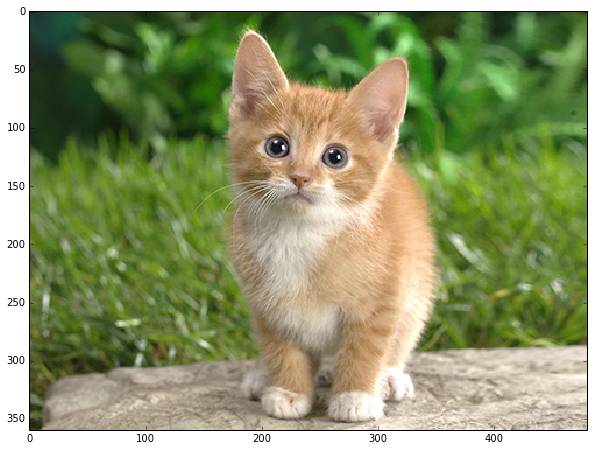

In [8]:
image = caffe.io.load_image('/root/machineLearning/deepNeuralNet/caffe/datasets/images/samples/cat.jpg')
transformed_image = transformer.preprocess('data', image)
plt.imshow(image)

Great ! Now we have our net ready so is the image that we need to classify. Remember that data in Caffe is interpreted using blobs. Quoting from [Caffe's Documentation](http://caffe.berkeleyvision.org/tutorial/net_layer_blob.html) : *As data and derivatives flow through the network in the forward and backward passes Caffe stores, communicates, and manipulates the information as blobs: the blob is the standard array and unified memory interface for the framework.* 

For caffe to get information from the image, it needs to be copied to the memory allocated by Caffe. 

Once the image is loaded into memory, we can perform classification with it. To start classification, we call ***net.forward()*** and redirect its output to a variavle named output (name can be anything obviously). The probability of the output is saved in a vector format. Since we gave a batch size of 50, there will be 50 input images at once. The probability of our image will be saved in the **[0]**th location. The output probability can be extracted out by properly calling it. Finally the predicted class of the image can be extracted by using argmax which returns the indices of the maximum values along an axis. 

In [9]:
# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = transformed_image

### perform classification
output = net.forward()

output_prob = output['prob'][0]  # the output probability vector for the first image in the batch

print 'predicted class is:', output_prob.argmax()

predicted class is: 281


In our case, for the cute cat, the predicted class is 281. Make sure that you are getting the same (just in case).

For our eyes the image is a cute cat, agreed. To see what our net thinks it is, let us fetch the label of the predicted/classified image. Load the labels file from the dataset and output the specific label.

In [10]:
# load ImageNet labels

labels_file = '/root/machineLearning/deepNeuralNet/caffe/datasets/ilsvrc12/synset_words.txt'

if not os.path.exists(labels_file):
    !/root/caffe/data/ilsvrc12/get_ilsvrc_aux.sh
    
labels = np.loadtxt(labels_file, str, delimiter='\t')

print 'output label:', labels[output_prob.argmax()]

output label: n02123045 tabby, tabby cat


What do you think about the prediction ? Fair ? Let us see a quantitative result. We will output the top five predictions from the output layer (softmax layer).

In [11]:
# sort top five predictions from softmax output
top_inds = output_prob.argsort()[::-1][:5]  # reverse sort and take five largest items

print 'probabilities and labels:'
zip(output_prob[top_inds], labels[top_inds])

probabilities and labels:


[(0.31243613, 'n02123045 tabby, tabby cat'),
 (0.23797171, 'n02123159 tiger cat'),
 (0.1238724, 'n02124075 Egyptian cat'),
 (0.10075741, 'n02119022 red fox, Vulpes vulpes'),
 (0.07095696, 'n02127052 lynx, catamount')]

To find the time required to train the network for the particular input, let us use timeit function.

In [12]:
# find the time required to train the network
%timeit net.forward()

1 loop, best of 3: 688 ms per loop


**blob.data.shape** can be used to find the shape of the different layers in your net. Loop across it to get shape of each layer.

In [13]:
# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(10, 3, 227, 227)
conv1	(10, 96, 55, 55)
pool1	(10, 96, 27, 27)
norm1	(10, 96, 27, 27)
conv2	(10, 256, 27, 27)
pool2	(10, 256, 13, 13)
norm2	(10, 256, 13, 13)
conv3	(10, 384, 13, 13)
conv4	(10, 384, 13, 13)
conv5	(10, 256, 13, 13)
pool5	(10, 256, 6, 6)
fc6	(10, 4096)
fc7	(10, 4096)
fc8	(10, 1000)
prob	(10, 1000)


In [14]:
for layer_name, param in net.params.iteritems():
    print layer_name + '\t' + str(param[0].data.shape), str(param[1].data.shape)

conv1	(96, 3, 11, 11) (96,)
conv2	(256, 48, 5, 5) (256,)
conv3	(384, 256, 3, 3) (384,)
conv4	(384, 192, 3, 3) (384,)
conv5	(256, 192, 3, 3) (256,)
fc6	(4096, 9216) (4096,)
fc7	(4096, 4096) (4096,)
fc8	(1000, 4096) (1000,)


In [15]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

We can filter out the weights and biases of each layer to visualize the changes happening in each layer. This is a powerful way of analyzing the net as it gives intuition into what is happening inside it. The image drawn above (layer by layer representation) together with the visualization of things happening in each layer will help us understand the net in more depth. Here we use the **conv1** layer for the same.

In [16]:
# the parameters are a list of [weights, biases]
filters = net.params['conv1'][0].data
filters.shape

(96, 3, 11, 11)

If you noticed, the shape of the filter is different from the function vis_square. So we need to transpose the vector accordingly before passing it into the function to visualize the layers. We pass in the data of first convolution layer. The image below shows that the lower layer is working as an edge detector of sort.

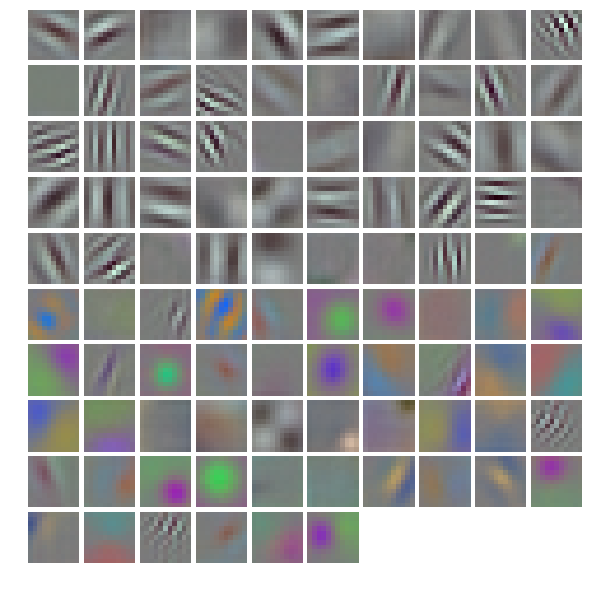

In [17]:
vis_square(filters.transpose(0, 2, 3, 1))

To visualize the data as such, we can use the net.blobs instead of net.params. This will give us a visual clue on what the data may look like and what is happening at the same time. We are doing it for the **conv1** layer.

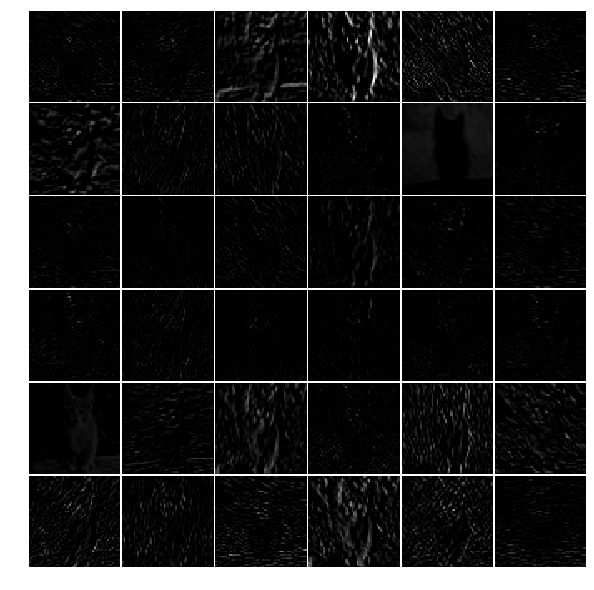

In [18]:
feat = net.blobs['conv1'].data[0, :36]
vis_square(feat)

Similarly for the **pool5** layer.

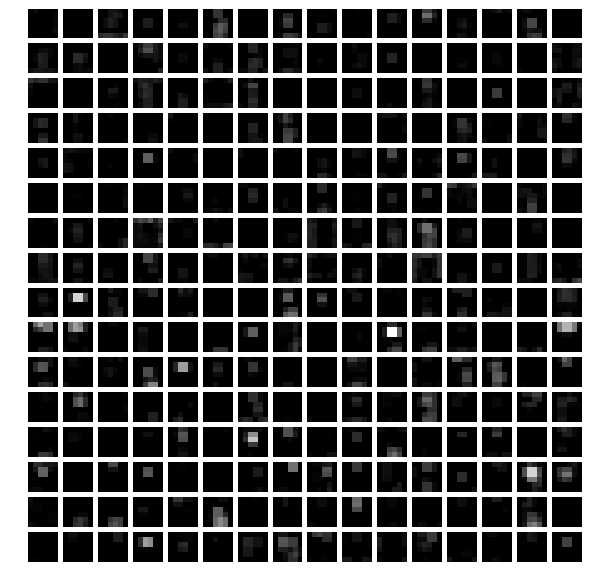

In [19]:
feat = net.blobs['pool5'].data[0]
vis_square(feat)

We can plot graphs using the various data saved in the layers. The fully connected layer fc6 will result in the following plot.

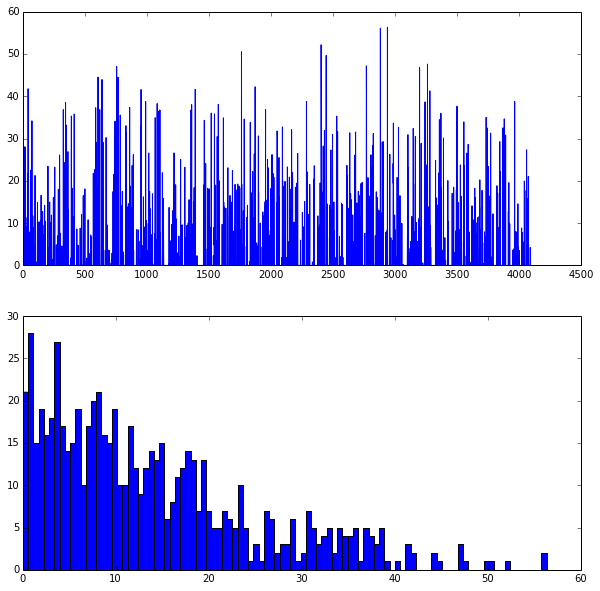

In [20]:
feat = net.blobs['fc6'].data[0]
plt.subplot(2, 1, 1)
plt.plot(feat.flat)
plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat[feat.flat > 0], bins=100)

The probability of predicting the correct label for the particular image we classified can be plotted as well. X-axis is the Feature's label number and Y-Axis is the probability of correct classification.

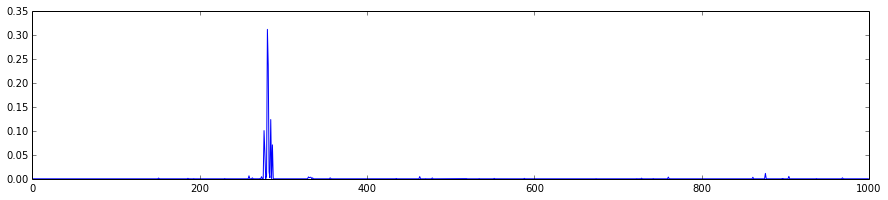

In [21]:
feat = net.blobs['prob'].data[0]
plt.figure(figsize=(15, 3))
plt.plot(feat.flat)

Now, let us download an image of our own and try to classify it. Here, a http link of the image is used to download the image. The image is then loaded into Caffe. The image is then preprocessed using the transformer we defined earlier.

Once we are done with the preprocessing, we have a formated image in the memory that is ready to be classified. Perform the classification by running **net.forward()**. The output probability can be found just like earlier.The top 5 probabilities are dound out, the image displayed and the 5 probabilities are printed out.

--2016-04-16 03:11:42--  http://www.depositagift.com/img/bank_assets/Band-Aid.jpg
Resolving www.depositagift.com (www.depositagift.com)... 50.28.4.115
Connecting to www.depositagift.com (www.depositagift.com)|50.28.4.115|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34197 (33K) [image/jpeg]
Saving to: 'image.jpg'

100%[======================================>] 34,197      --.-K/s   in 0.1s    

2016-04-16 03:11:42 (239 KB/s) - 'image.jpg' saved [34197/34197]

probabilities and labels:


[(0.94379258, 'n02786058 Band Aid'),
 (0.0064510447, 'n03530642 honeycomb'),
 (0.0061318246, 'n07684084 French loaf'),
 (0.0045337547, 'n04476259 tray'),
 (0.0042723794, 'n03314780 face powder')]

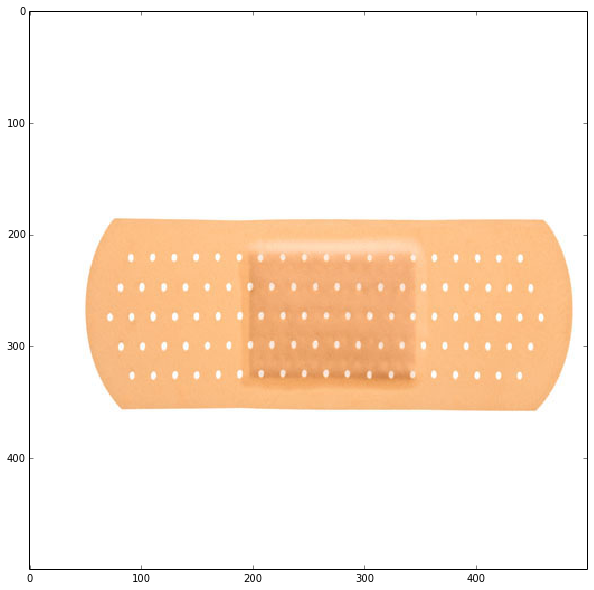

In [22]:
# download an image
# for example:
# my_image_url = "https://upload.wikimedia.org/wikipedia/commons/b/be/Orang_Utan%2C_Semenggok_Forest_Reserve%2C_Sarawak%2C_Borneo%2C_Malaysia.JPG"
# my_image_url = "https://www.petfinder.com/wp-content/uploads/2012/11/140272627-grooming-needs-senior-cat-632x475.jpg"  # paste your URL here
# my_image_url = "http://kids.nationalgeographic.com/content/dam/kids/photos/animals/Mammals/H-P/lion-male-roar.jpg"

my_image_url ="http://www.depositagift.com/img/bank_assets/Band-Aid.jpg"

!wget -O image.jpg $my_image_url

# transform it and copy it into the net
image = caffe.io.load_image('image.jpg')
net.blobs['data'].data[...] = transformer.preprocess('data', image)

# perform classification
net.forward()

# obtain the output probabilities
output_prob = net.blobs['prob'].data[0]

# sort top five predictions from softmax output
top_inds = output_prob.argsort()[::-1][:5]

plt.imshow(image)

print 'probabilities and labels:'
zip(output_prob[top_inds], labels[top_inds])

That's well classified! 94 percent probability is good indeed. But the image itself is a simple one with clean background and of decent size.

Now we will look into how we create a network of our own by defining our own network architecture and solver parameters. Here we will be using the python code to create the prototxt files for us automatically.

# Solving in Python with LeNet

In this example, we'll explore learning with Caffe in Python, using the fully-exposed `Solver` interface. This is the example hosted in Caffe's GitHub and is available in Caffe's examples folder.

The previous tutorial explained in detail a classification example in Caffe. The classification was done in a network extracted from a pretrained one. For this tutorial, we will see how to create a Neural Net of your own by defining it from scratch.

The python interface for Caffe 'pycaffe' need to be built beforehand. If you have followed the [installation instructions](https://github.com/arundasan91/Caffe/blob/master/Caffe%20Installation%20Instructions.md) on the previous tutorial, pycaffe is already built and active.

* We'll be using the provided LeNet example data and networks (make sure you've downloaded the data and created the databases, as below). More on LeNet [here](http://yann.lecun.com/exdb/lenet/).

In [23]:
# run scripts from caffe root
os.chdir(caffe_root)
# Download data
!data/mnist/get_mnist.sh
# Prepare data
!examples/mnist/create_mnist.sh
# back to examples
os.chdir('examples')

Downloading...
Creating lmdb...
Done.


### 2. Creating the net 

Now let's make a variant of LeNet, the classic 1989 convnet architecture.

We'll need two external files to help out:
* the net `prototxt`, defining the architecture and pointing to the train/test data
* the solver `prototxt`, defining the learning parameters

We start by creating the net. We'll write the net in a succinct and natural way as Python code that serializes to Caffe's protobuf model format.

This network expects to read from pregenerated LMDBs, but reading directly from `ndarray`s is also possible using `MemoryDataLayer`.

In [24]:
from caffe import layers as L, params as P

def lenet(lmdb, batch_size):
    # our version of LeNet: a series of linear and simple nonlinear transformations
    n = caffe.NetSpec()
    
    n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
                             transform_param=dict(scale=1./255), ntop=2)
    
    n.conv1 = L.Convolution(n.data, kernel_size=5, num_output=20, weight_filler=dict(type='xavier'))
    n.pool1 = L.Pooling(n.conv1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.conv2 = L.Convolution(n.pool1, kernel_size=5, num_output=50, weight_filler=dict(type='xavier'))
    n.pool2 = L.Pooling(n.conv2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.fc1 =   L.InnerProduct(n.pool2, num_output=500, weight_filler=dict(type='xavier'))
    n.relu1 = L.ReLU(n.fc1, in_place=True)
    n.score = L.InnerProduct(n.relu1, num_output=10, weight_filler=dict(type='xavier'))
    n.loss =  L.SoftmaxWithLoss(n.score, n.label)
    
    return n.to_proto()
    
with open('mnist/lenet_auto_train.prototxt', 'w') as f:
    f.write(str(lenet('mnist/mnist_train_lmdb', 64)))
    
with open('mnist/lenet_auto_test.prototxt', 'w') as f:
    f.write(str(lenet('mnist/mnist_test_lmdb', 100)))

The neural net is defined as a function `lenet` with parameters `lmdb` and `batch_size`. `lmdb` is the dataset and `batch_size` is the number of images that you are inputting at once. 

    n = caffe.NetSpec()
The NetSpec class creates the NetParameter's which helps in defining each and every layer of the net. A formal definition can be found [here](https://github.com/BVLC/caffe/blob/master/python/caffe/net_spec.py) and reads like:
***"A NetSpec contains a set of Tops (assigned directly as attributes). Calling NetSpec.to_proto generates a NetParameter containing all of the layers needed to produce all of the assigned Tops, using the assigned names."***

Once we are done with the NetSpec() class, we can start defining our net. The input data is defined first here. 
    
    n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
    transform_param=dict(scale=1./255), ntop=2)
    
The `batch_size` parameter is the one we passed on to the function. The dataset contains both data values and corresponding labels. The input layer thus has an `ntop` value of 2. The data source is of the type `lmdb`. The backend is defined as `P.Data.LMDB`. The `transform_param` field indicate the feature scaling coefficient which this maps the [0, 255] data to [0, 1].

    n.conv1 = L.Convolution(n.data, kernel_size=5, num_output=20, weight_filler=dict(type='xavier'))
    n.pool1 = L.Pooling(n.conv1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    
The first layer consists of a Convolutional layer and a pooling layer. The feed-in layer for the `conv1` layer is the `n.data` layer. The `kernal_size` and `num_output` determines the size of the kernal to apply the filters and the number of output neurons from the layer respectively. The weights are filled initially using the `xavier` algorithm.
Similarly, the second layer consists of a convolution and a pooling layer.

    n.conv2 = L.Convolution(n.pool1, kernel_size=5, num_output=50, weight_filler=dict(type='xavier'))
    n.pool2 = L.Pooling(n.conv2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    
The second layer is connected to a fully connected layer and a rectified linear unit (ReLU). Another fully connected layer is added to the ReLU layer and finally a loss layer is connected as well.
    
    n.fc1 =   L.InnerProduct(n.pool2, num_output=500, weight_filler=dict(type='xavier'))
    n.relu1 = L.ReLU(n.fc1, in_place=True)
    n.score = L.InnerProduct(n.relu1, num_output=10, weight_filler=dict(type='xavier'))
    n.loss =  L.SoftmaxWithLoss(n.score, n.label)

If you found the term `xavier` in the `weight_filler` section to be odd, check these links [1](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf), [2](http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization) to know about it better. 

Basically, `xavier` algorithm is used as a weight filler in caffe during the time of initialization. It makes sure that the weights intilialized are reasonable enough to pass through the many deep layers.

The net has been written to disk in a more verbose but human-readable serialization format using Google's protobuf library. You can read, write, and modify this description directly. Let's take a look at the train net.

In [25]:
!cat mnist/lenet_auto_train.prototxt

layer {
  name: "data"
  type: "Data"
  top: "data"
  top: "label"
  transform_param {
    scale: 0.00392156862745
  }
  data_param {
    source: "mnist/mnist_train_lmdb"
    batch_size: 64
    backend: LMDB
  }
}
layer {
  name: "conv1"
  type: "Convolution"
  bottom: "data"
  top: "conv1"
  convolution_param {
    num_output: 20
    kernel_size: 5
    weight_filler {
      type: "xavier"
    }
  }
}
layer {
  name: "pool1"
  type: "Pooling"
  bottom: "conv1"
  top: "pool1"
  pooling_param {
    pool: MAX
    kernel_size: 2
    stride: 2
  }
}
layer {
  name: "conv2"
  type: "Convolution"
  bottom: "pool1"
  top: "conv2"
  convolution_param {
    num_output: 50
    kernel_size: 5
    weight_filler {
      type: "xavier"
    }
  }
}
layer {
  name: "pool2"
  type: "Pooling"
  bottom: "conv2"
  top: "pool2"
  pooling_param {
    pool: MAX
    kernel_size: 2
    stride: 2
  }
}
layer {
  name: "fc1"
  type: "InnerProduct"
  bottom: "pool2"
  top: "fc1"
  inner_product_param {
    num_out

In [26]:
!cat mnist/lenet_auto_solver.prototxt

# The train/test net protocol buffer definition
train_net: "mnist/lenet_auto_train.prototxt"
test_net: "mnist/lenet_auto_test.prototxt"
# test_iter specifies how many forward passes the test should carry out.
# In the case of MNIST, we have test batch size 100 and 100 test iterations,
# covering the full 10,000 testing images.
test_iter: 100
# Carry out testing every 500 training iterations.
test_interval: 500
# The base learning rate, momentum and the weight decay of the network.
base_lr: 0.01
momentum: 0.9
weight_decay: 0.0005
# The learning rate policy
lr_policy: "inv"
gamma: 0.0001
power: 0.75
# Display every 100 iterations
display: 100
# The maximum number of iterations
max_iter: 10000
# snapshot intermediate results
snapshot: 5000
snapshot_prefix: "mnist/lenet"


### 3. Loading and checking the solver

* Let's pick a device and load the solver. We'll use SGD (with momentum), but other methods (such as Adagrad and Nesterov's accelerated gradient) are also available.

In [27]:
from pylab import *
%matplotlib inline

In [28]:
#caffe.set_device(0)
caffe.set_mode_cpu()

### load the solver and create train and test nets
solver = None  # ignore this workaround for lmdb data (can't instantiate two solvers on the same data)
solver = caffe.SGDSolver('mnist/lenet_auto_solver.prototxt')

* To get an idea of the architecture of our net, we can check the dimensions of the intermediate features (blobs) and parameters (these will also be useful to refer to when manipulating data later).

In [29]:
# each output is (batch size, feature dim, spatial dim)
[(k, v.data.shape) for k, v in solver.net.blobs.items()]

[('data', (64, 1, 28, 28)),
 ('label', (64,)),
 ('conv1', (64, 20, 24, 24)),
 ('pool1', (64, 20, 12, 12)),
 ('conv2', (64, 50, 8, 8)),
 ('pool2', (64, 50, 4, 4)),
 ('fc1', (64, 500)),
 ('score', (64, 10)),
 ('loss', ())]

In [30]:
# just print the weight sizes (we'll omit the biases)
[(k, v[0].data.shape) for k, v in solver.net.params.items()]

[('conv1', (20, 1, 5, 5)),
 ('conv2', (50, 20, 5, 5)),
 ('fc1', (500, 800)),
 ('score', (10, 500))]

* Before taking off, let's check that everything is loaded as we expect. We'll run a forward pass on the train and test nets and check that they contain our data.

In [31]:
solver.net.forward()  # train net
solver.test_nets[0].forward()  # test net (there can be more than one)

{'loss': array(2.3281469345092773, dtype=float32)}

train labels: [ 5.  0.  4.  1.  9.  2.  1.  3.]


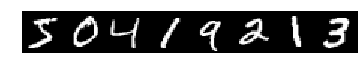

In [32]:
# we use a little trick to tile the first eight images
imshow(solver.net.blobs['data'].data[:8, 0].transpose(1, 0, 2).reshape(28, 8*28), cmap='gray'); axis('off')
print 'train labels:', solver.net.blobs['label'].data[:8]

test labels: [ 7.  2.  1.  0.  4.  1.  4.  9.]


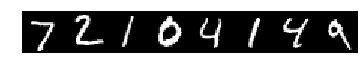

In [33]:
imshow(solver.test_nets[0].blobs['data'].data[:8, 0].transpose(1, 0, 2).reshape(28, 8*28), cmap='gray'); axis('off')
print 'test labels:', solver.test_nets[0].blobs['label'].data[:8]

### 4. Stepping the solver

Both train and test nets seem to be loading data, and to have correct labels.

* Let's take one step of (minibatch) SGD and see what happens.

In [34]:
solver.step(1)

Do we have gradients propagating through our filters? Let's see the updates to the first layer, shown here as a $4 \times 5$ grid of $5 \times 5$ filters.

(-0.5, 24.5, 19.5, -0.5)

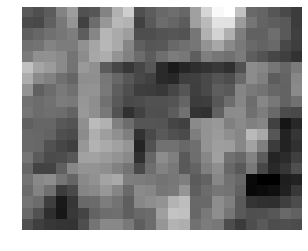

In [35]:
imshow(solver.net.params['conv1'][0].diff[:, 0].reshape(4, 5, 5, 5)
       .transpose(0, 2, 1, 3).reshape(4*5, 5*5), cmap='gray'); axis('off')

### 5. Writing a custom training loop

Something is happening. Let's run the net for a while, keeping track of a few things as it goes.
Note that this process will be the same as if training through the `caffe` binary. In particular:
* logging will continue to happen as normal
* snapshots will be taken at the interval specified in the solver prototxt (here, every 5000 iterations)
* testing will happen at the interval specified (here, every 500 iterations)

Since we have control of the loop in Python, we're free to compute additional things as we go, as we show below. We can do many other things as well, for example:
* write a custom stopping criterion
* change the solving process by updating the net in the loop

In [36]:
%%time
niter = 200
test_interval = 25
# losses will also be stored in the log
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))
output = zeros((niter, 8, 10))

# the main solver loop
for it in range(niter):
    solver.step(1)  # SGD by Caffe
    
    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    
    # store the output on the first test batch
    # (start the forward pass at conv1 to avoid loading new data)
    solver.test_nets[0].forward(start='conv1')
    output[it] = solver.test_nets[0].blobs['score'].data[:8]
    
    # run a full test every so often
    # (Caffe can also do this for us and write to a log, but we show here
    #  how to do it directly in Python, where more complicated things are easier.)
    if it % test_interval == 0:
        print 'Iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            solver.test_nets[0].forward()
            correct += sum(solver.test_nets[0].blobs['score'].data.argmax(1)
                           == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4

Iteration 0 testing...
Iteration 25 testing...
Iteration 50 testing...
Iteration 75 testing...
Iteration 100 testing...
Iteration 125 testing...
Iteration 150 testing...
Iteration 175 testing...
CPU times: user 8min 43s, sys: 22min 18s, total: 31min 1s
Wall time: 1min 17s


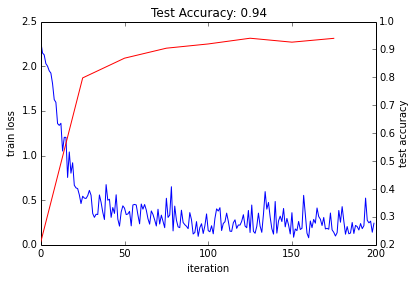

In [37]:
_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss)
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.2f}'.format(test_acc[-1]))

The loss seems to have dropped quickly and coverged (except for stochasticity), while the accuracy rose correspondingly. Hooray!

* Since we saved the results on the first test batch, we can watch how our prediction scores evolved. We'll plot time on the $x$ axis and each possible label on the $y$, with lightness indicating confidence.

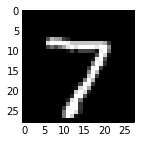

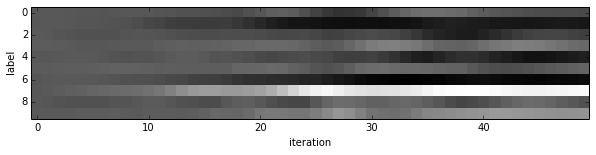

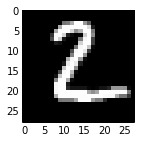

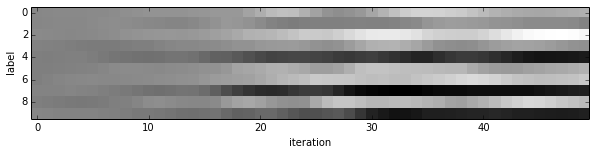

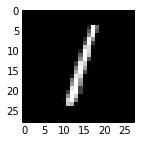

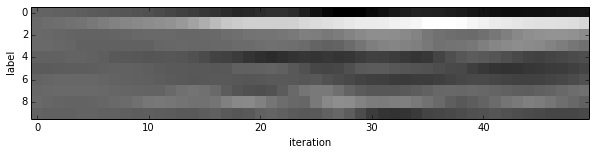

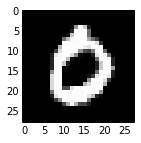

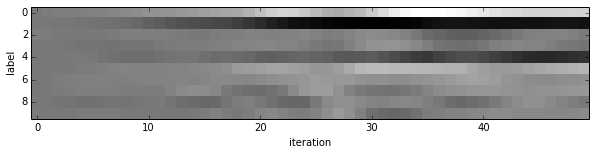

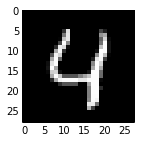

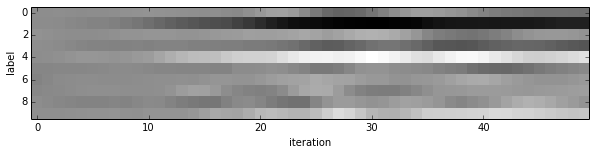

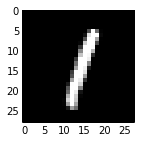

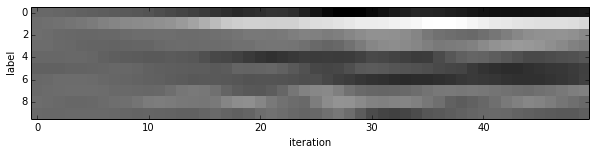

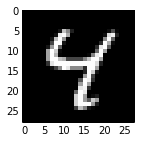

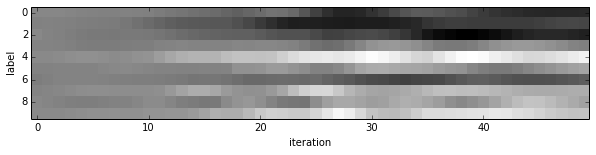

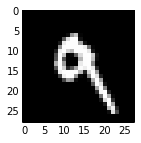

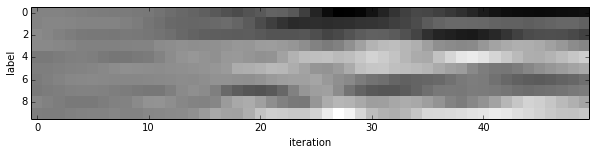

In [38]:
for i in range(8):
    figure(figsize=(2, 2))
    imshow(solver.test_nets[0].blobs['data'].data[i, 0], cmap='gray')
    figure(figsize=(10, 2))
    imshow(output[:50, i].T, interpolation='nearest', cmap='gray')
    xlabel('iteration')
    ylabel('label')

We started with little idea about any of these digits, and ended up with correct classifications for each. If you've been following along, you'll see the last digit is the most difficult, a slanted "9" that's (understandably) most confused with "4".

* Note that these are the "raw" output scores rather than the softmax-computed probability vectors. The latter, shown below, make it easier to see the confidence of our net (but harder to see the scores for less likely digits).

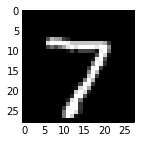

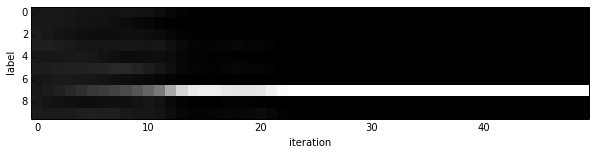

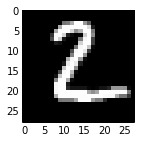

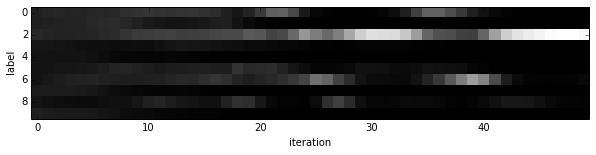

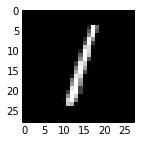

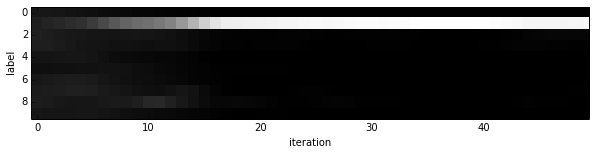

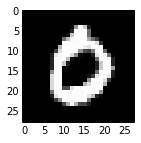

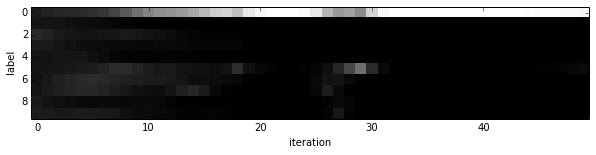

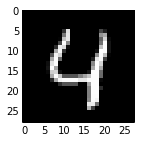

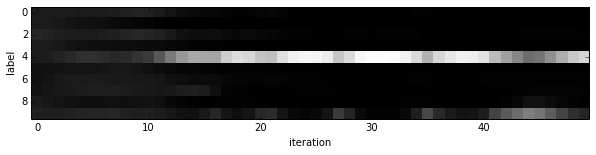

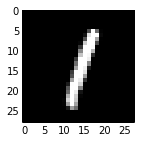

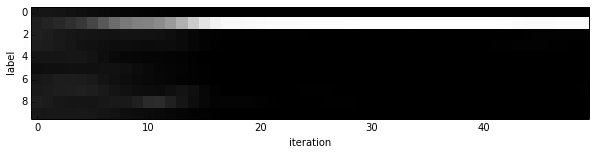

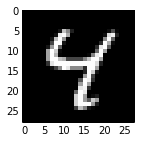

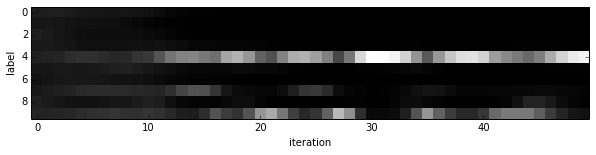

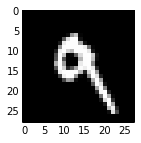

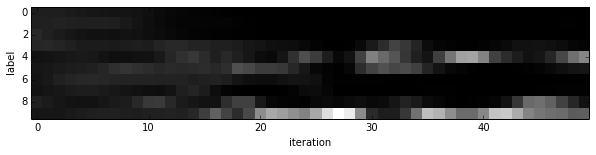

In [39]:
for i in range(8):
    figure(figsize=(2, 2))
    imshow(solver.test_nets[0].blobs['data'].data[i, 0], cmap='gray')
    figure(figsize=(10, 2))
    imshow(exp(output[:50, i].T) / exp(output[:50, i].T).sum(0), interpolation='nearest', cmap='gray')
    xlabel('iteration')
    ylabel('label')

### 6. Experiment with architecture and optimization

Now that we've defined, trained, and tested LeNet there are many possible next steps:

- Define new architectures for comparison
- Tune optimization by setting `base_lr` and the like or simply training longer
- Switching the solver type from `SGD` to an adaptive method like `AdaDelta` or `Adam`

`` CHANGES THAT I MADE TO THE ARCHITECTURE ``

1. Switch the nonlinearity from `ReLU` to `ELU`.
2. Stacked one fully connected layer between conv1 and conv2 layer
3. Switched the solver type to `Nesterov`.

Iteration 0 testing...
Iteration 25 testing...
Iteration 50 testing...
Iteration 75 testing...
Iteration 100 testing...
Iteration 125 testing...
Iteration 150 testing...
Iteration 175 testing...
Iteration 200 testing...
Iteration 225 testing...


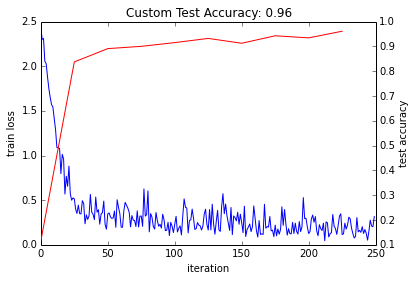

In [40]:
train_net_path = 'mnist/custom_auto_train.prototxt'
test_net_path = 'mnist/custom_auto_test.prototxt'
solver_config_path = 'mnist/custom_auto_solver.prototxt'

### define net
def custom_net(lmdb, batch_size):
    # define your own net!
    n = caffe.NetSpec()
    
    # keep this data layer for all networks
    n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
                             transform_param=dict(scale=1./255), ntop=2)
    
    # EDIT HERE this is the LeNet variant we have already tried
    n.conv1 = L.Convolution(n.data, kernel_size=5, num_output=20, weight_filler=dict(type='xavier'))
     
    n.pool1 = L.Pooling(n.conv1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    
    n.fc1 =   L.InnerProduct(n.pool1, num_output=500, weight_filler=dict(type='xavier'))
    
    n.conv2 = L.Convolution(n.pool1, kernel_size=5, num_output=50, weight_filler=dict(type='xavier'))
    
    n.pool2 = L.Pooling(n.conv2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
     
    n.fc2 =   L.InnerProduct(n.pool2, num_output=500, weight_filler=dict(type='xavier'))
   
    #EDIT HERE consider L.ELU or L.Sigmoid for the nonlinearity
    n.relu1 = L.ELU(n.fc2, in_place=True)
     
   
    n.score =   L.InnerProduct(n.fc2, num_output=10, weight_filler=dict(type='xavier'))
    
    # keep this loss layer for all networks
    n.loss =  L.SoftmaxWithLoss(n.score, n.label)
    
    return n.to_proto()

with open(train_net_path, 'w') as f:
    f.write(str(custom_net('mnist/mnist_train_lmdb', 64)))    
with open(test_net_path, 'w') as f:
    f.write(str(custom_net('mnist/mnist_test_lmdb', 100)))

### define solver
from caffe.proto import caffe_pb2
s = caffe_pb2.SolverParameter()

# Set a seed for reproducible experiments:
# this controls for randomization in training.
s.random_seed = 0xCAFFE

# Specify locations of the train and (maybe) test networks.
s.train_net = train_net_path
s.test_net.append(test_net_path)
s.test_interval = 500  # Test after every 500 training iterations.
s.test_iter.append(100) # Test on 100 batches each time we test.

s.max_iter = 10000     # no. of times to update the net (training iterations)
 
# EDIT HERE to try different solvers
# solver types include "SGD", "Adam", and "Nesterov" among others.
#s.type = "SGD"
s.type = "Nesterov"

# Set the initial learning rate for SGD.
s.base_lr = 0.01  # EDIT HERE to try different learning rates
# Set momentum to accelerate learning by
# taking weighted average of current and previous updates.
s.momentum = 0.9
# Set weight decay to regularize and prevent overfitting
s.weight_decay = 5e-4

# Set `lr_policy` to define how the learning rate changes during training.
# This is the same policy as our default LeNet.
#s.lr_policy = 'inv'
s.lr_policy = 'fixed'
s.gamma = 0.0001
s.power = 0.75
# EDIT HERE to try the fixed rate (and compare with adaptive solvers)
# `fixed` is the simplest policy that keeps the learning rate constant.
# s.lr_policy = 'fixed'

# Display the current training loss and accuracy every 1000 iterations.
s.display = 1000

# Snapshots are files used to store networks we've trained.
# We'll snapshot every 5K iterations -- twice during training.
s.snapshot = 5000
s.snapshot_prefix = 'mnist/custom_net'

# Train on the GPU
s.solver_mode = caffe_pb2.SolverParameter.CPU

# Write the solver to a temporary file and return its filename.
with open(solver_config_path, 'w') as f:
    f.write(str(s))

### load the solver and create train and test nets
solver = None  # ignore this workaround for lmdb data (can't instantiate two solvers on the same data)
solver = caffe.get_solver(solver_config_path)

### solve
niter = 250  # EDIT HERE increase to train for longer
test_interval = niter / 10
# losses will also be stored in the log
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))

# the main solver loop
for it in range(niter):
    solver.step(1)  # SGD by Caffe
    
    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    
    # run a full test every so often
    # (Caffe can also do this for us and write to a log, but we show here
    #  how to do it directly in Python, where more complicated things are easier.)
    if it % test_interval == 0:
        print 'Iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            solver.test_nets[0].forward()
            correct += sum(solver.test_nets[0].blobs['score'].data.argmax(1)
                           == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4

_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss)
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Custom Test Accuracy: {:.2f}'.format(test_acc[-1]))

We successfully improved the accuracy from 94 percent to 96 percent by changing various parameters listed. This is a good way to go.

Caffe's examples are a great source of information. Next stop, finding solution to a problem of our own.

Learn from mistakes. Happy Coding !